In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = (200)

### Approximating a uniform distribution
We repeatedly draw ($N_{\text{exp}}$ number of times) a sample of 120 birthdays, more specifically, just the corresponding months. We want to show, that as we increase $N_{\text{exp}}$, the birthday month distribution more and more approximates a uniform distribution, i.e. every month is taken with equal probability.

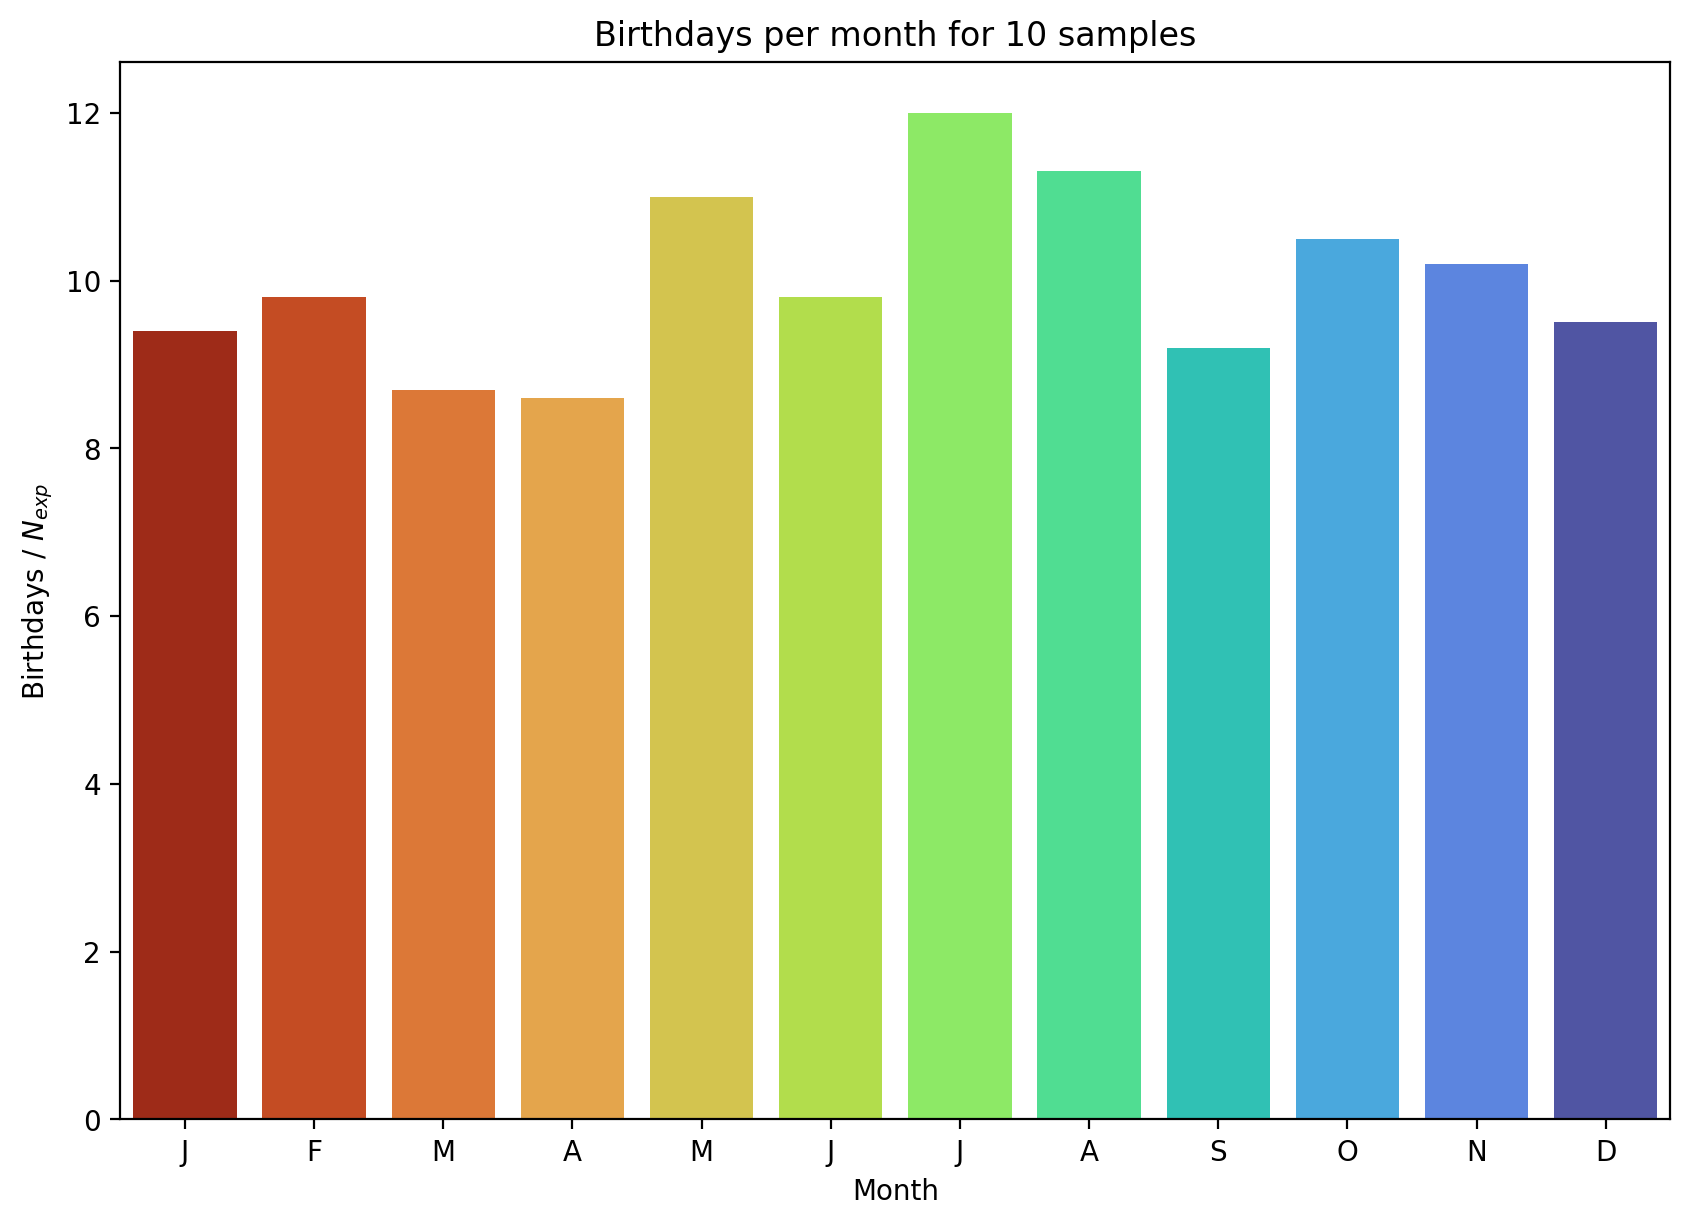

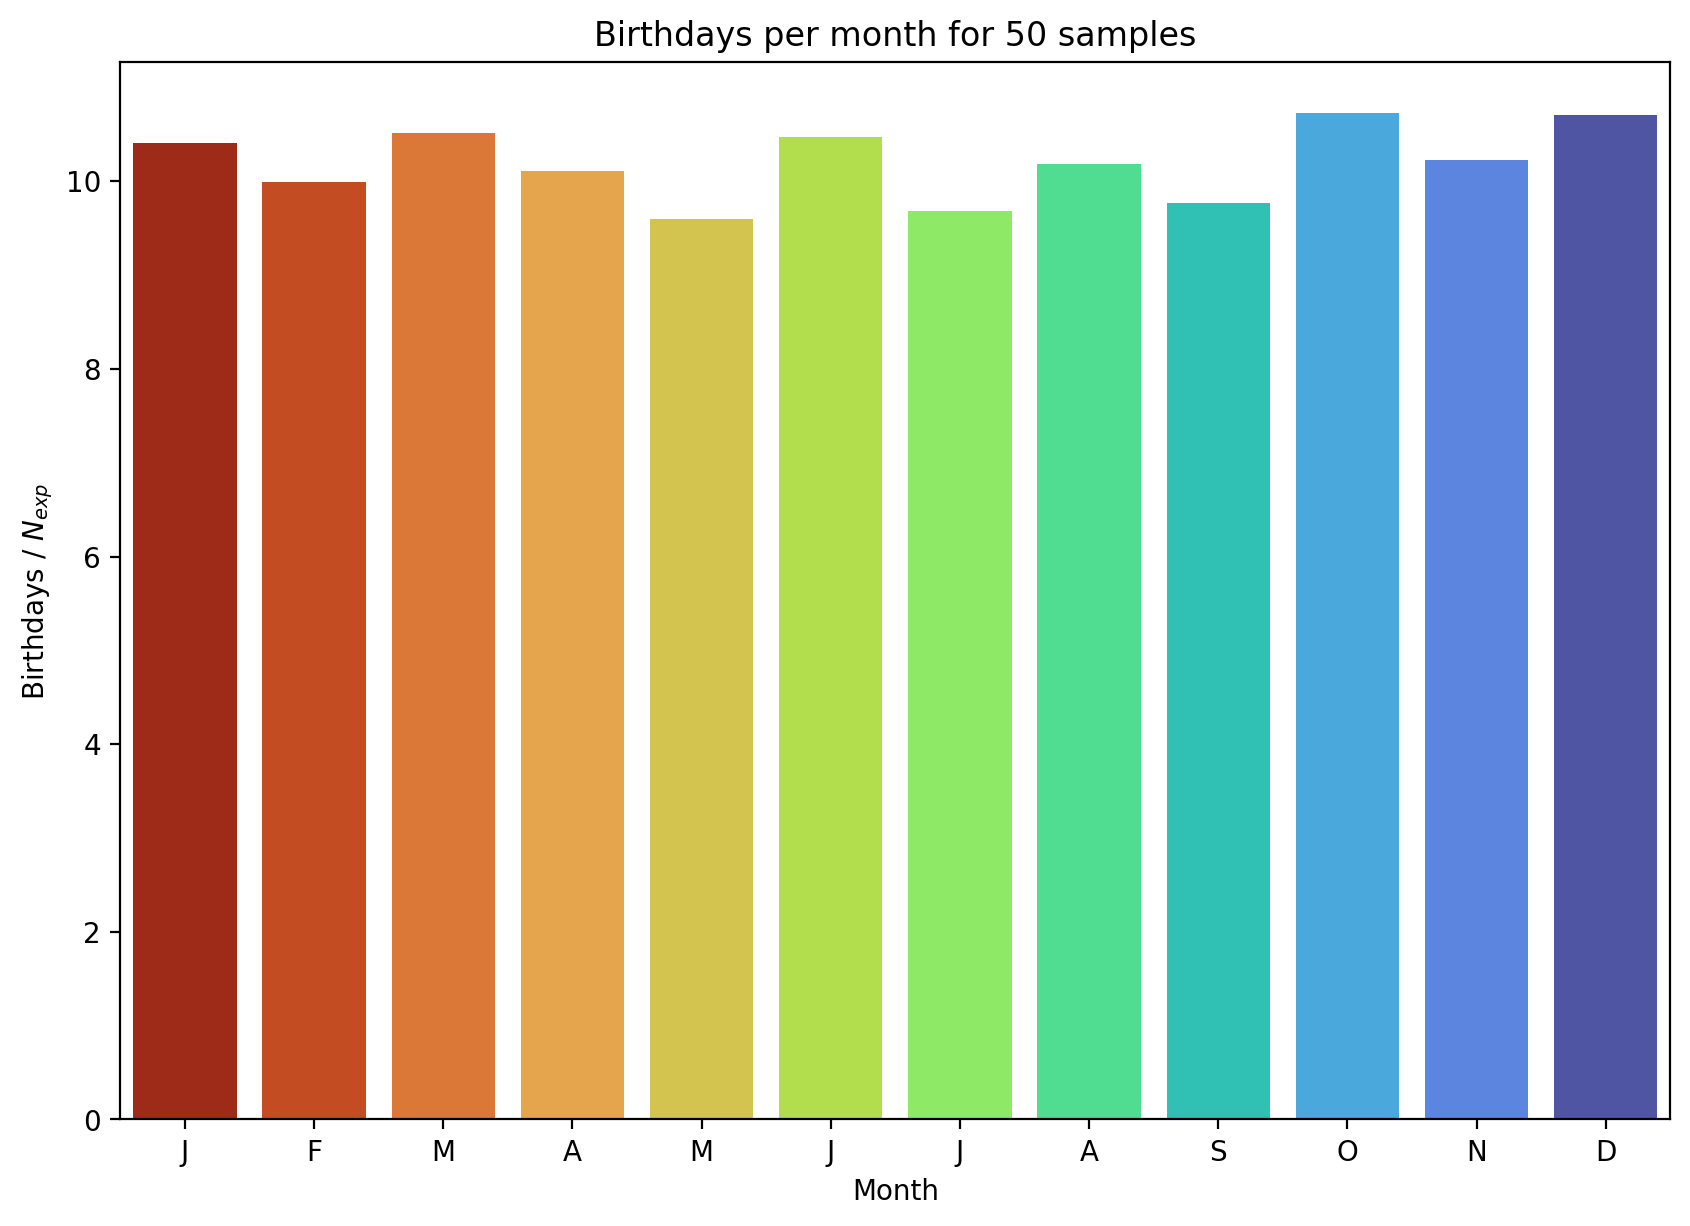

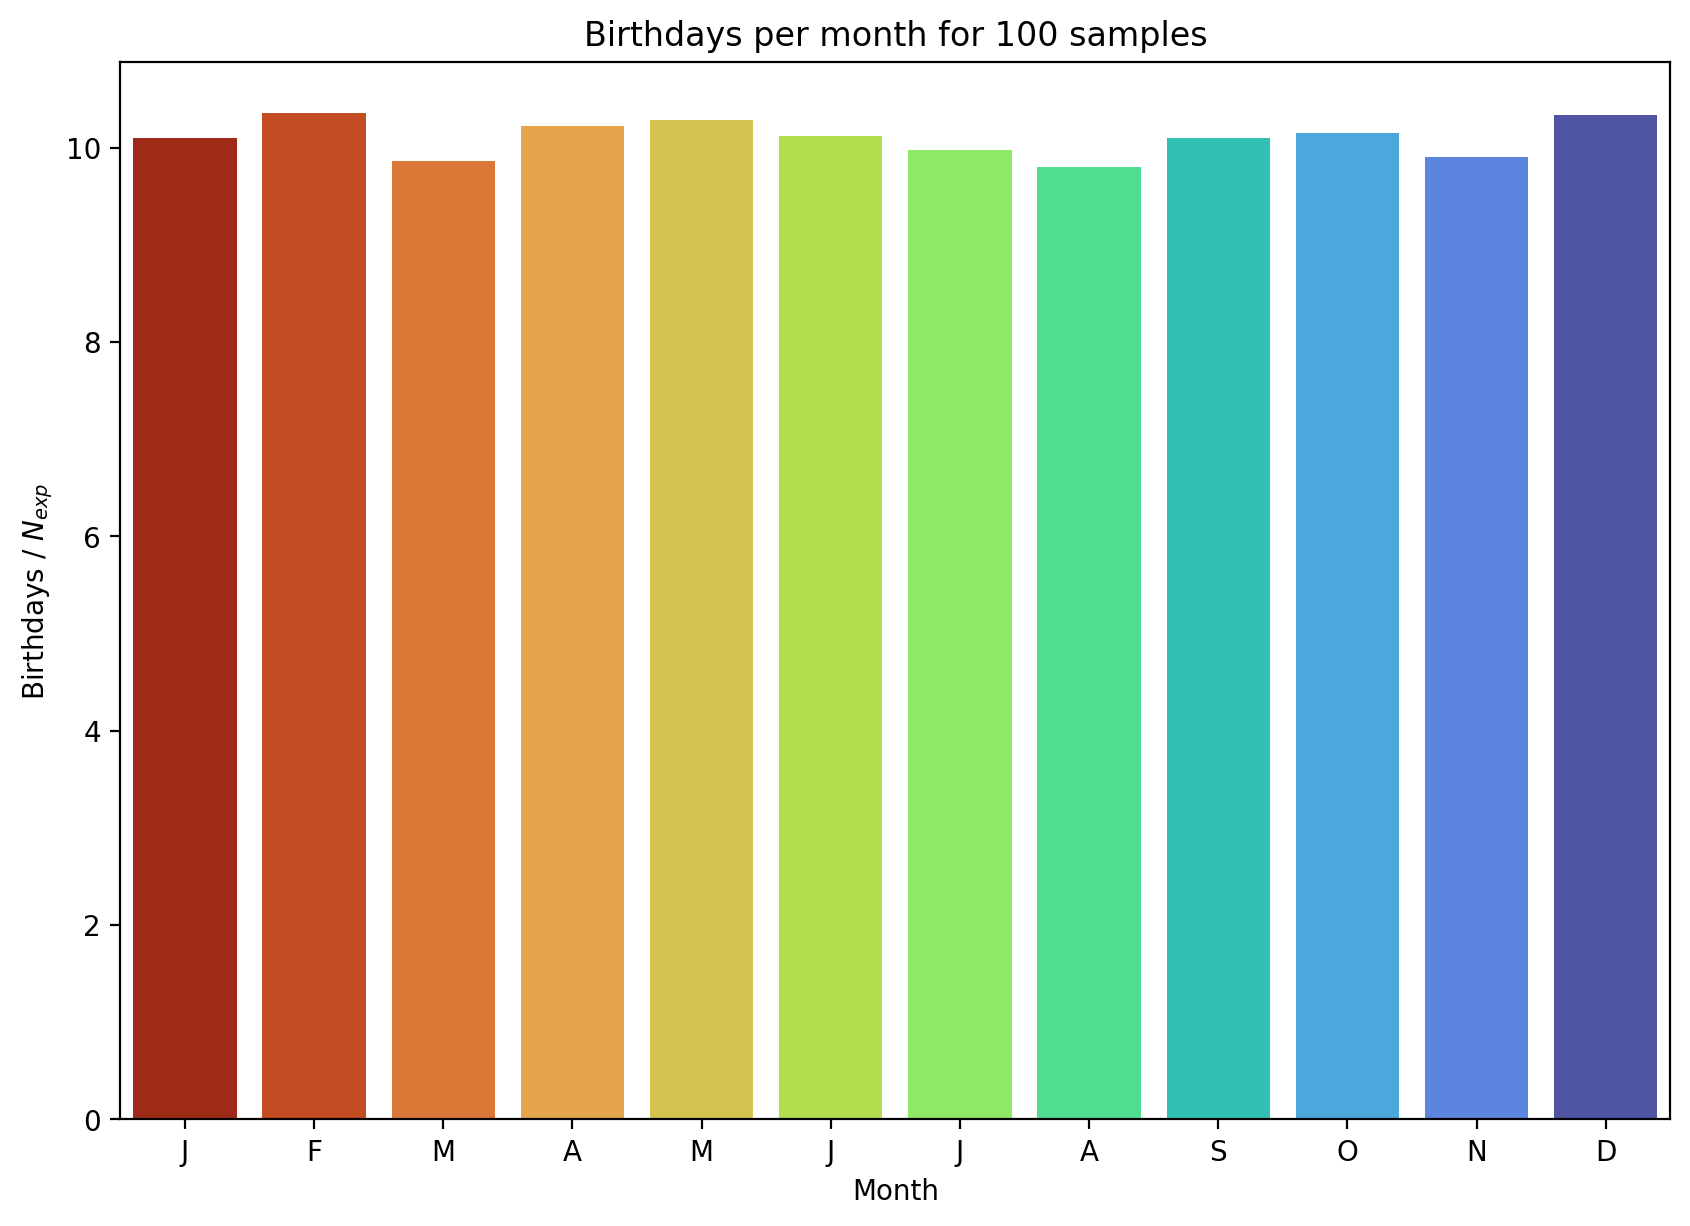

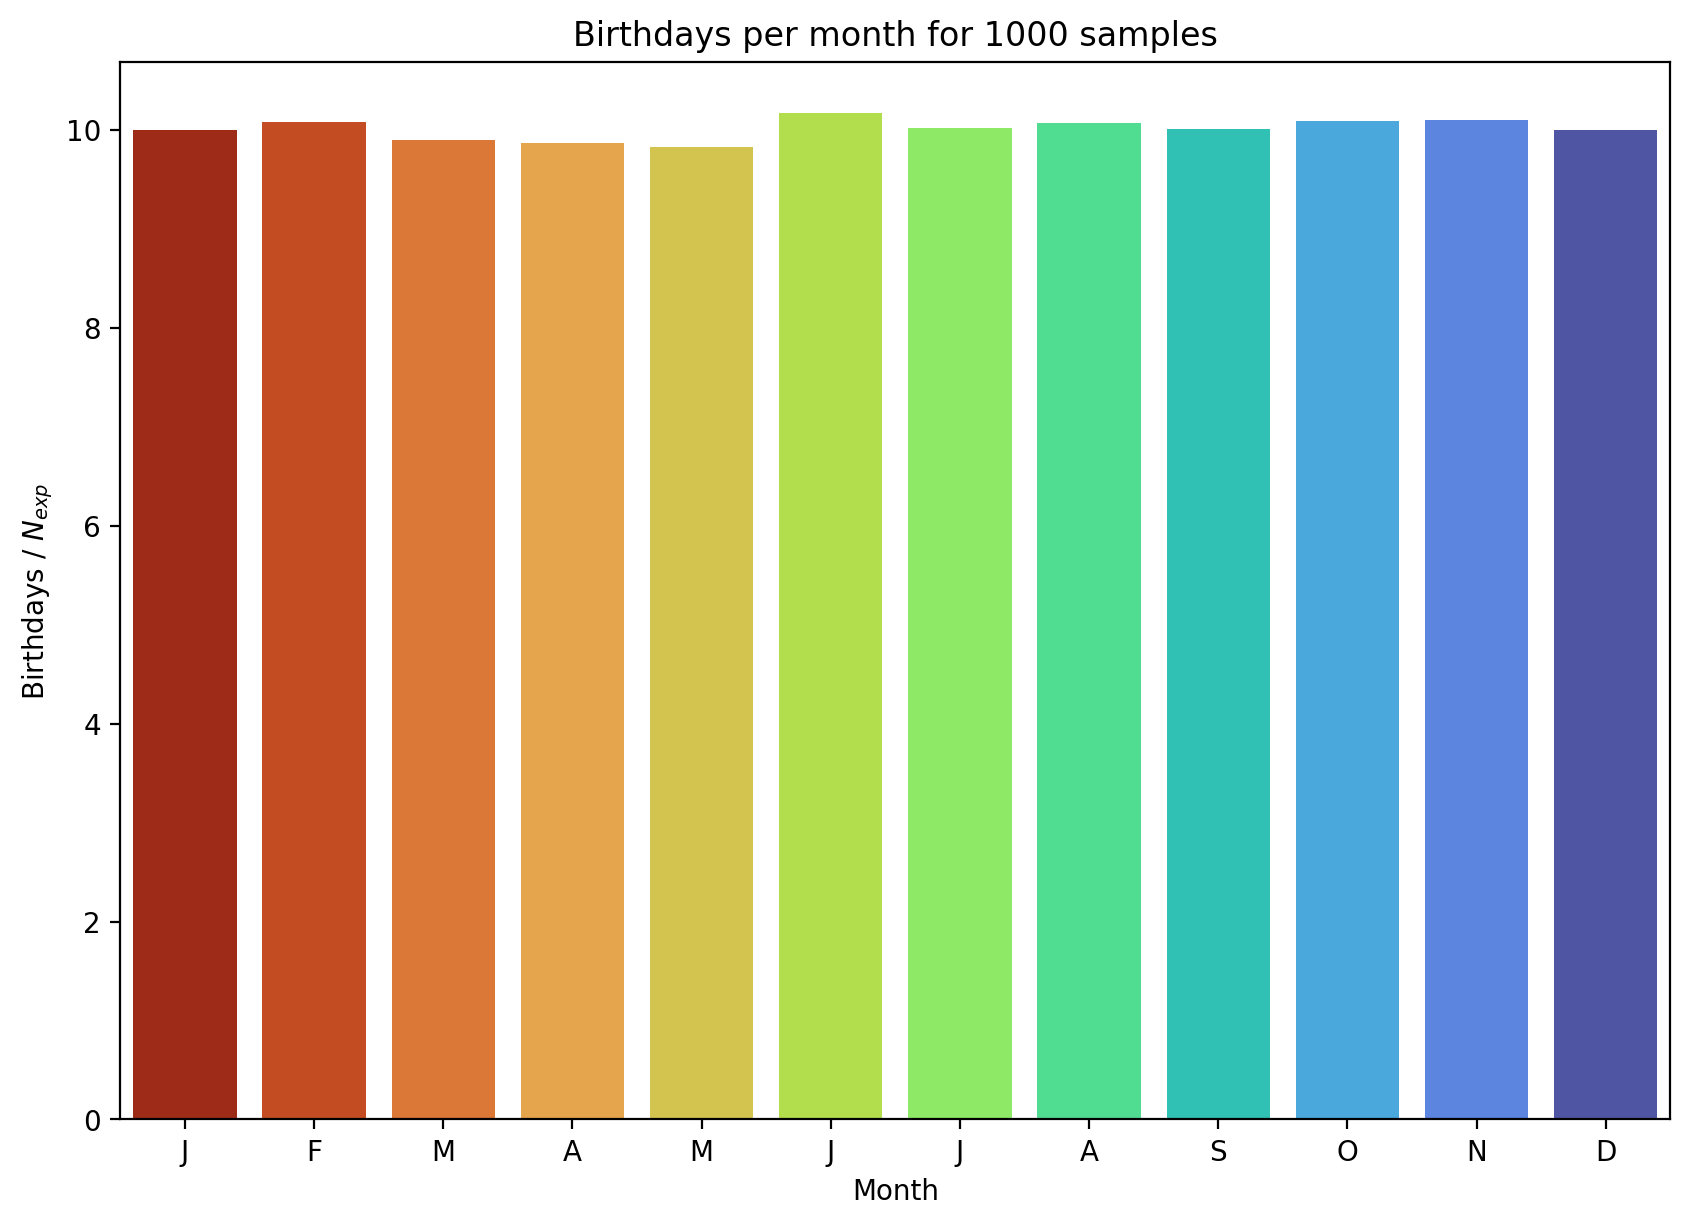

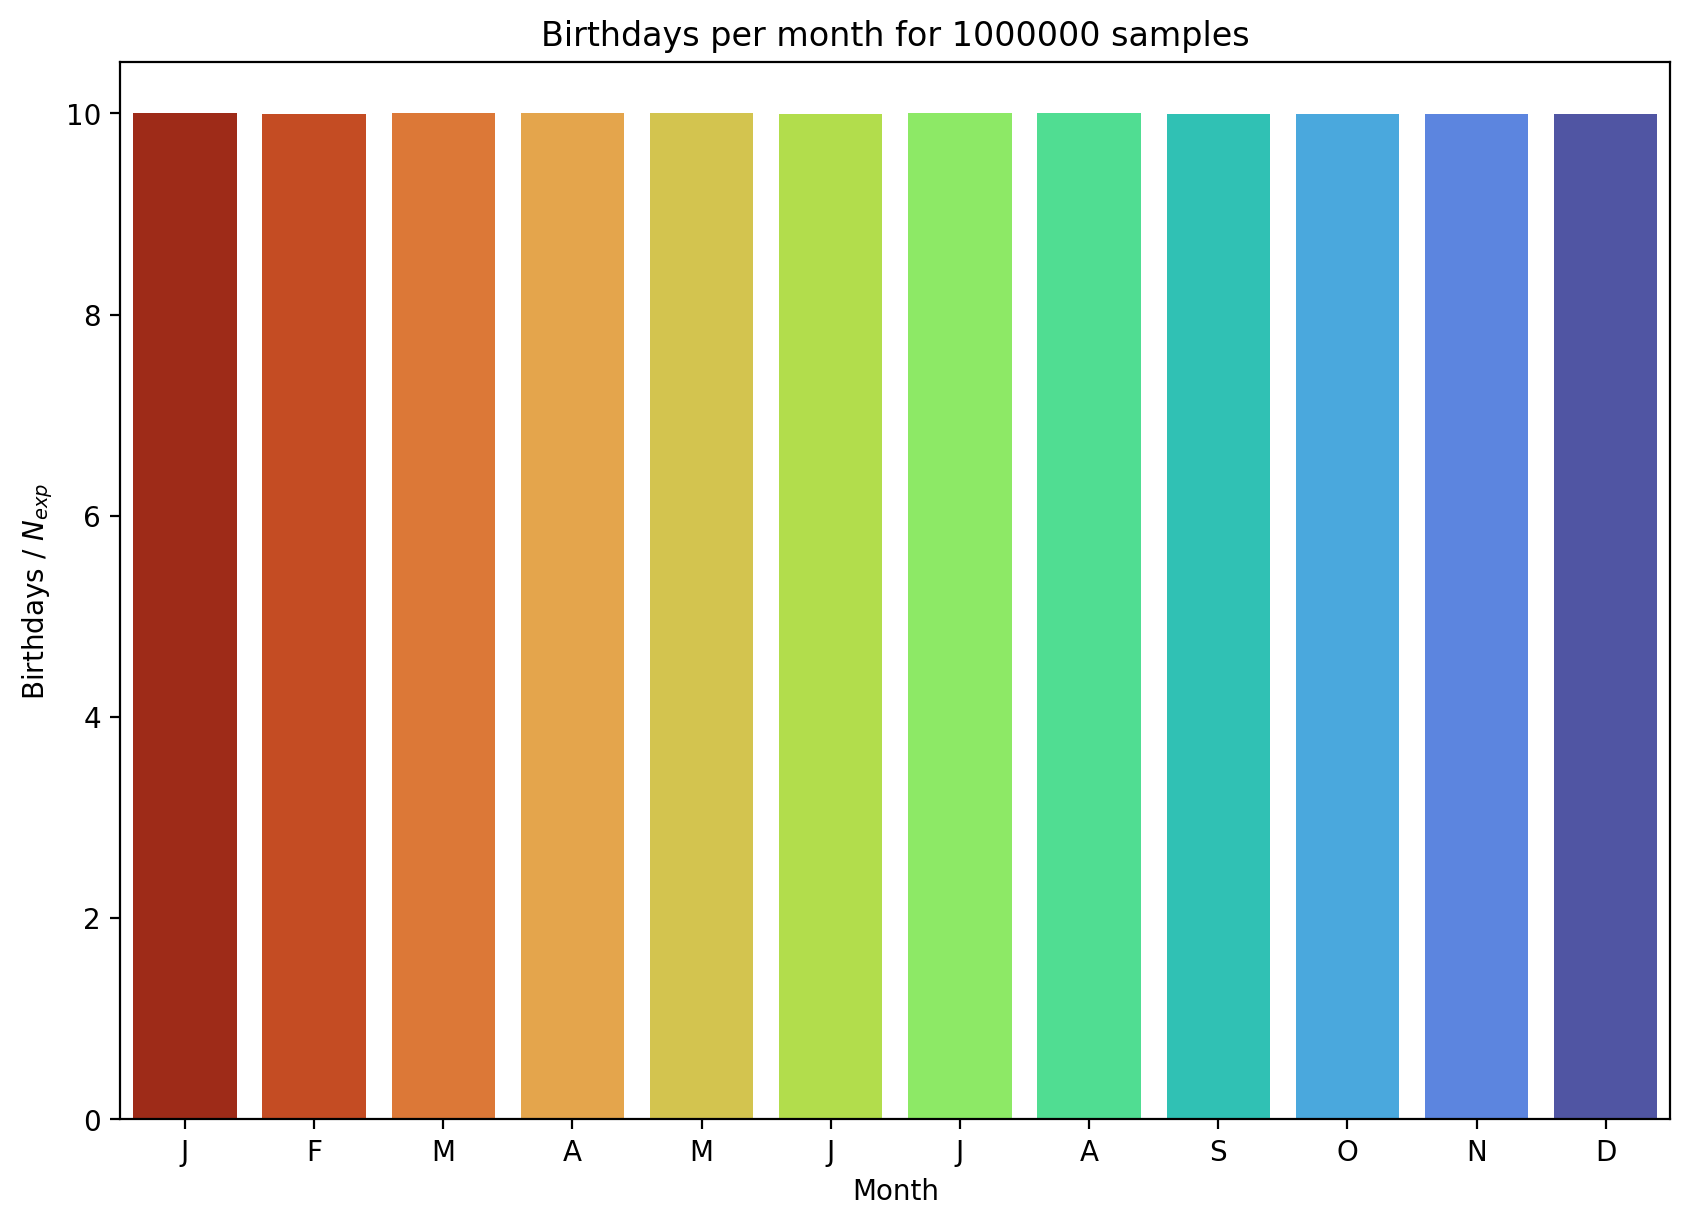

In [5]:
ndata = 120                            #sample size
Nexps = [10, 50, 100, 1000, 1000000]   #number of experiments
months = np.arange(1,13)
bs = np.zeros(12)

for N in Nexps:
    for i in range(N):
        bds = np.random.uniform(0, 12, ndata)
        bs = bs + np.histogram(bds, bins=range(13))[0]
    bs = bs/N
    plt.title("Birthdays per month for {} samples".format(N))
    sns.barplot(x = months, y = bs, palette='turbo_r')
    plt.xlabel('Month')
    plt.xticks(np.arange(0,12),labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    plt.ylabel(r'Birthdays / $N_{{exp}}$')
    plt.show()

Indeed, we approximate a uniform distribution.

### Birthday paradox

We want to estimate the probability that in $N$ random pepole, there are at least two with the same birthday. Birthday of person $B$ and $A$ only coincede once in $365$. Thus, $P(\text{coinc.}, N=2) = \frac{1}{365}$ and the complementary probability (the 2 birthdays fall on different days) is hence $P(\text{non-coinc.}, N=2) = 1- \frac{1}{365} = \frac{364}{365}$. <br>
Adding a third person leads to the joint probability for different birthdays of $$P(\text{non-coinc.}, N=3) = \left(1- \frac{1}{365} \right) \left(1- \frac{2}{365} \right) = \frac{364}{365} \frac{363}{365}$$ as the probabilities are independent. Adding people to the party, we obtain $$P(\text{non-coinc.}, N) = \frac{364}{365} \frac{363}{365} \frac{362}{365} \cdots \frac{365-N+1}{365}. $$ For small $x$ we have $$e^{-x} \approx 1-x$$ and hence 
$$ \frac{365-N+1}{365} = 1 - \frac{N-1}{365} \approx e^{-(N-1)/365} $$
as long as $N$ is considerably smaller than $365$. We therefore approximate the probability that all birthdays fall on different days as 
$$ P(\text{non-coinc.}, N) \approx e^{-1/365} e^{-2/365} e^{-3/365} \cdots  e^{-(N-1)/365} = e^{-\frac{N(N-1)}{2} \frac{1}{365}},$$
since $1+2+...+(N-1) = \binom{n}{2}$. <br>
Finally, the probability of having at least 2 birthdays coincede must be the complement to his probability, so that
$$ P(\text{coinc.},N) = 1 - e^{-\frac{N(N-1)}{2} \frac{1}{365}} \approx  1 - e^{-\frac{N^2}{730}}  $$


In [47]:
P = lambda N : 1 - np.exp(-N**2/730) # approximate

def p_exact(N):
    p = 1
    for n in range(0,N-1):
        p *= (365-n)/365
    return 1-p

<AxesSubplot:xlabel='$N$', ylabel='$P(coinc, N)$'>

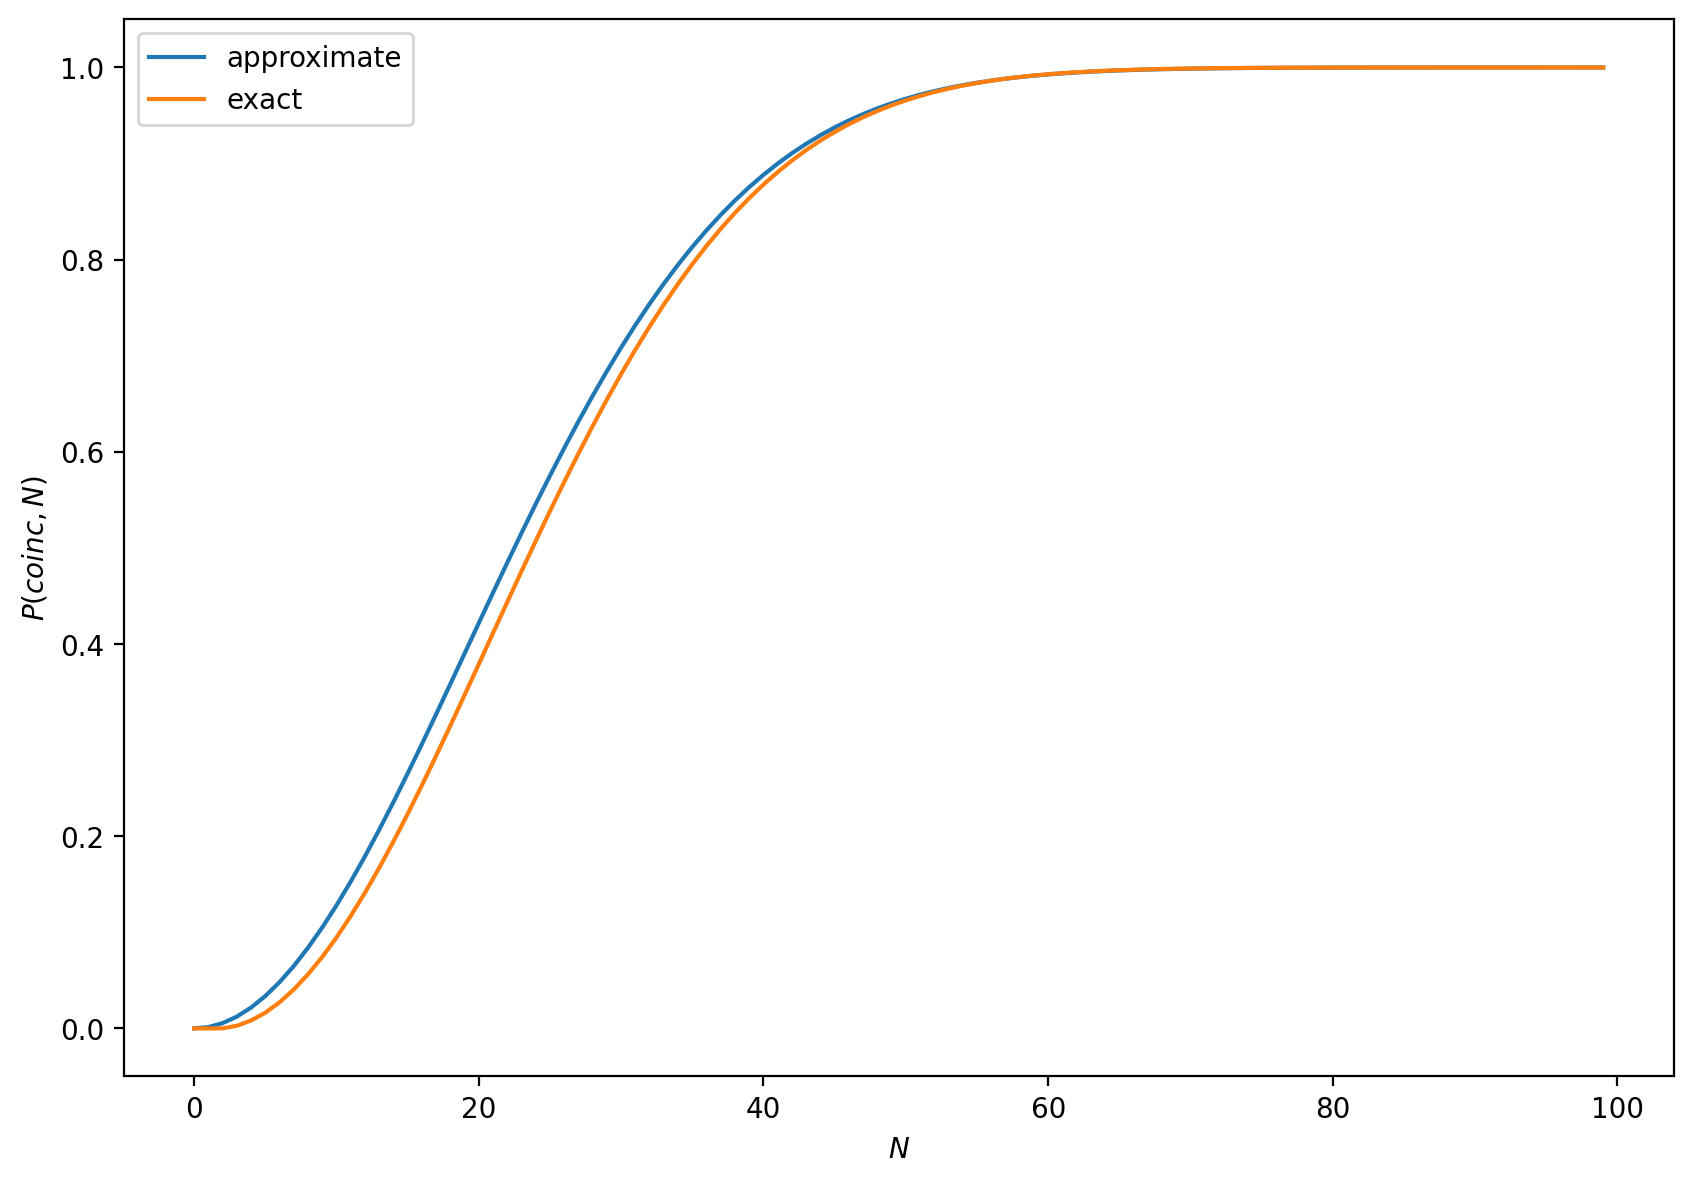

In [48]:
Ns = np.arange(0,100)
ps = [p_exact(N) for N in Ns]
plt.xlabel('$N$')
plt.ylabel('$P(coinc, N)$')
sns.lineplot(x=Ns, y=P(Ns), palette='red', label = 'approximate')
sns.lineplot(x=Ns, y=ps, palette='red', label = 'exact')

In [52]:
ps[21], P(20)

(0.41143838358058027, 0.42186345748271603)

We can see, that already for 20 people, the probability for coincidence of birthdays is roughly $40 \%$. This is known as the $\textit{birthday paradox}$.

When we solve for $N$, we find $$ N \approx \sqrt{-730 \ln(1-p)}.$$

In [54]:
N = lambda P : np.sqrt(-730*np.log(1-P))

print("{} persons are needed, such that birthdays coincede with probability {},".format(math.ceil(N(0.69)), 0.69))
print("{} persons are needed, such that birthdays coincede with probability {},".format(math.ceil(N(0.95)), 0.95))
print("{} persons are needed, such that birthdays coincede with probability {}.".format(math.ceil(N(0.99)), 0.99))

30 persons are needed, such that birthdays coincede with probability 0.69,
47 persons are needed, such that birthdays coincede with probability 0.95,
58 persons are needed, such that birthdays coincede with probability 0.99.
